Here, in this notebook, we develop the SNR features of the primary KOIS

In [30]:
import numpy as np
import pandas as pd
import os
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import time
from scipy.optimize import brute

In [31]:
file_list = np.loadtxt("../Catalogs/prim_ltf_trimmed.txt", dtype = str)
print file_list.shape
star_list = [x.split("_")[0] for x in file_list]
print star_list

(3080,)
['10000941-0', '10000941-10', '10000941-11', '10000941-12', '10000941-13', '10000941-14', '10000941-15', '10000941-1', '10000941-2', '10000941-3', '10000941-4', '10000941-5', '10000941-6', '10000941-7', '10000941-8', '10000941-9', '10024701-0', '10024701-1', '10024701-2', '10024701-3', '10024701-4', '10024701-5', '10024701-6', '10024701-7', '10024701-8', '10024701-9', '10053138-0', '10053138-1', '10053138-2', '10053138-3', '10053138-4', '10053138-5', '10053138-6', '10063208-0', '10063208-1', '10063208-2', '10063208-3', '10063208-4', '10063208-5', '10063208-6', '10063208-7', '10063208-8', '10063208-9', '10130039-0', '10130039-10', '10130039-11', '10130039-1', '10130039-2', '10130039-3', '10130039-4', '10130039-5', '10130039-6', '10130039-7', '10130039-8', '10130039-9', '10154388-0', '10154388-10', '10154388-11', '10154388-1', '10154388-2', '10154388-3', '10154388-4', '10154388-5', '10154388-6', '10154388-7', '10154388-8', '10154388-9', '10155029-0', '10155029-1', '10155029-2', '

In [32]:
data_table = pd.read_csv("../Data/KOI_feat_files_3080_fixed_ordered_try2.csv", index_col = 0)
data_table.head()

,mod_sig_pri_dv,mod_sig_sec_dv,mod_sig_ter_dv,mod_sig_pos_dv,mod_fa1_dv,mod_fa2_dv,mod_fred_dv,modshiftval1_dv,modshiftval2_dv,modshiftval3_dv,modshiftval4_dv,modshiftval5_dv,modshiftval6_dv,white_noise,red_noise,BLS_Period_1_0,BLS_Tc_1_0,BLS_SN_1_0,BLS_SR_1_0,BLS_SDE_1_0,BLS_Depth_1_0,BLS_Qtran_1_0,BLS_Qingress_1_0,BLS_OOTmag_1_0,BLS_i1_1_0,BLS_i2_1_0,BLS_deltaChi2_1_0,BLS_fraconenight_1_0,BLS_Npointsintransit_1_0,BLS_Ntransits_1_0,BLS_Npointsbeforetransit_1_0,BLS_Npointsaftertransit_1_0,BLS_Rednoise_1_0,BLS_Whitenoise_1_0,BLS_SignaltoPinknoise_1_0
0,0.00010,-9.993175,0.006914,-0.000487,2.890723,1.683670,1.005397,-2.890624,-1.690483,-1.683083,-12.830259,-11.683759,-11.676358,0.005614,0.005645,1.166019,133.694162,4.46218,0.00003,4.79999,0.00010,0.10756,0.16870,10.00004,0.85345,0.96101,-0.0,0.14202,133.0,24.0,148.0,134.0,0.00004,0.00017,5.83681
1,0.00018,-9.982177,0.017533,-0.014838,3.338459,3.020050,0.252293,-3.337746,-3.037403,-3.005032,-42.904219,-13.019760,-12.987389,0.011328,0.002858,12.531007,292.943500,4.99247,0.00003,5.13574,0.00018,0.03167,0.24718,10.00043,0.01888,0.05055,-0.0,0.88621,51.0,3.0,47.0,50.0,0.00001,0.00018,6.80030
2,0.00015,-9.989170,0.009608,-0.008737,3.180644,2.974051,0.464413,-3.180321,-2.983509,-2.965164,-24.689889,-12.972829,-12.954484,0.006980,0.003241,14.365608,367.369536,3.87008,0.00003,3.99866,0.00015,0.04222,0.20025,9.99937,0.92866,0.97089,-0.0,0.43709,48.0,2.0,53.0,54.0,0.00000,0.00015,7.04246
3,0.00010,-9.996074,0.002071,-0.019393,2.881972,2.019152,0.993675,-2.881872,-2.021124,-1.999660,-12.941671,-12.017298,-11.995834,0.013045,0.012962,2.521888,445.942972,4.50673,0.00003,4.66672,0.00010,0.10963,0.16462,9.99813,0.32612,0.43575,-0.0,0.14349,140.0,11.0,147.0,140.0,0.00003,0.00016,6.21358
4,0.00025,-9.976817,0.021595,-0.020386,3.253059,3.050659,0.153960,-3.251435,-3.072004,-3.030023,-68.054421,-13.049071,-13.007089,0.015466,0.002381,13.265326,522.020280,6.34797,0.00004,6.35056,0.00025,0.03029,0.00331,9.99772,0.94459,0.97488,-0.0,0.80420,35.0,2.0,38.0,41.0,0.00002,0.00020,6.96992


In [33]:
#loaf the primary KOI table to determine the correct period of the kois in our dataset
file_name = '../../../Training/catalogs/shortperiodbright_KOI.csv'
koi = pd.read_csv(file_name)
#print koi.columns.values
print len(np.unique(koi["kepid"])),  koi.shape
star_name = koi["kepid"]
max_planets = koi["koi_tce_plnt_num"].max()
koi.head(5)

284 (392, 50)


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,4966,10000941,K04146.01,Kepler-1558 b,CONFIRMED,CANDIDATE,0.999,0,0,0,0,3.504723,0.000016,-0.000016,133.72225,0.00346,-0.00346,0.309,0.167,-0.309,1.9464,0.0997,-0.0997,90.7,5.6,-5.6,0.80,0.10,-0.08,1019.0,NaN,NaN,254.49,105.36,-73.49,18.4,1,q1_q17_dr25_tce,5115.0,154.0,-139.0,4.477,0.095,-0.105,0.854,0.103,-0.093,286.81937,46.911690,13.632
1,4967,10000941,K04146.02,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,0,2.573844,0.000017,-0.000017,132.17126,0.00534,-0.00534,0.044,0.427,-0.044,1.9200,0.1470,-0.1470,46.6,4.9,-4.9,0.57,0.07,-0.06,1129.0,NaN,NaN,384.24,159.06,-110.97,10.9,2,q1_q17_dr25_tce,5115.0,154.0,-139.0,4.477,0.095,-0.105,0.854,0.103,-0.093,286.81937,46.911690,13.632
2,2605,10024701,K02002.01,Kepler-1046 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,14.375046,0.000087,-0.000087,139.05924,0.00510,-0.00510,0.927,0.019,-0.672,3.2080,0.1510,-0.1510,251.1,18.4,-18.4,2.05,0.33,-0.20,786.0,NaN,NaN,90.16,39.97,-23.14,15.7,1,q1_q17_dr25_tce,5931.0,106.0,-130.0,4.403,0.076,-0.114,1.053,0.168,-0.104,296.75574,46.998291,13.286
3,7125,10053138,K07279.01,NaN,CANDIDATE,CANDIDATE,0.769,0,0,0,0,11.772815,0.000164,-0.000164,138.78586,0.00967,-0.00967,0.407,0.067,-0.407,4.1320,0.3370,-0.3370,77.1,9.2,-9.2,0.93,0.17,-0.15,788.0,NaN,NaN,90.86,43.60,-30.65,9.9,1,q1_q17_dr25_tce,5410.0,81.0,-72.0,4.333,0.154,-0.126,1.056,0.191,-0.173,280.71948,47.072220,13.717
4,5105,10063208,K04292.01,Kepler-1583 b,CONFIRMED,CANDIDATE,0.995,0,0,0,0,9.328191,0.000102,-0.000102,132.85459,0.00993,-0.00993,0.044,0.400,-0.044,3.9910,0.2490,-0.2490,45.2,3.8,-3.8,0.59,0.09,-0.03,788.0,NaN,NaN,91.02,37.13,-13.94,13.7,1,q1_q17_dr25_tce,5525.0,74.0,-82.0,4.514,0.032,-0.128,0.888,0.138,-0.046,286.38693,47.016628,12.897


In [34]:
#This is the same file you just generated
koi_info = np.loadtxt("../Data/SNR_feats_KOIS_3080_fixed_try2.txt")

Here, you are generating the period error for the primary koi

In [35]:
#period error function
def period_func(vals, p_bls, p_inj):
    a, b = vals
    a = np.rint(a)
    b = np.rint(b)   
    return np.abs((a*p_bls - b*p_inj) / 0.5/(a*p_bls + b*p_inj))

In [36]:
planet_periods = np.zeros((data_table.shape[0], max_planets +1))
# have the number of max planets +1 as the max number of possible periods.
#the first indice will store the number of relevant indices
start  = time.time()

# select the planet with the largest signal for each star in the KOI list
for i, val in enumerate(star_list):
    name = int(val.split("-")[0])
    if name in star_name.tolist():
        location = np.where(star_name== name)[0]
        #if len(location) > 1:
        period_values = koi["koi_period"][location].values
        #print "all periods" , koi["koi_period"][location]
        #planet_num = np.where(koi["koi_model_snr"][location].max() == koi["koi_model_snr"][location])[0]
        #location =   np.where(star_name== int(name))[0][planet_num]
        #else:
        #location = np.where(star_name== int(name))[0][0]
        #period_values = koi["koi_period"][location].values
        try:
            planet_periods[:, 0] = len(period_values)
            planet_periods[i, 1: len(period_values)+1] = koi["koi_period"][location] #days
            print planet_periods[i, 0:len(period_values)+1]
          
        except:
            print name
        
    else:
        print "Not in list", name#+"ltf.lc"
    if i %1000 ==999:
        print i
   


[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[ 2.          3.50472344  2.5738437 ]
[  1.          14.37504582]
[  1.          14.37504582]
[  1.          14.37504582]
[  1.          14.37504582]
[  1.          14.37504582]
[  1.          14.37504582]
[  1.          14.37504582]
[  1.          14.37504582]
[  1.          14.37504582]
[  1.          14.37504582]
[  1.         11.7728146]
[  1.         11.7728146]
[  1.         11.7728146]
[  1.         11.7728146]
[  1.   

Need to check the integers a and b and the tolerance at the same time for each period to determine which period gives the smallest error

In [37]:
rranges=(slice(1, 6, 1), slice(1, 6, 1)) #allows a and b to range from  1 to 5
harmonics_koi = np.empty(shape = [data_table.shape[0],2]) # stores a and b 
final_planet_periods = np.zeros(data_table.shape[0]) #pick only one final period for each segment
planet_location = np.zeros_like(final_planet_periods)#this is to locate the correct planet in koi table for referencing later
#all_period_options = koi["koi_period"].values
print koi["koi_period"][1:10]
#print all_period_options

#stores final minimum error
tol_koi = np.zeros(data_table.shape[0])

for i in range(data_table.shape[0]):
    min_period_error = np.inf #stores minimum error

    #iterate over all the planets periods detected for that segment
    for j in range(1,int(planet_periods[i, 0]+1)):
        results = brute(period_func, ranges=rranges, args=(data_table["BLS_Period_1_0"][i], planet_periods[i, j]), full_output=True, finish= None)
        #calucalte resulting error with that planet period and detect bls period
        period_error = period_func( results[0].astype(int), data_table["BLS_Period_1_0"][i], planet_periods[i, j])
        min_period_error = np.min([period_error, min_period_error])
        #if your minimum has changed (will atleast once at the first time):
        if min_period_error==period_error:
            final_planet_periods[i] = planet_periods[i, j]
            harmonics_koi[i, :] =results[0]
            tol_koi[i] = period_error
            #check where period and star id matches
            planet_location[i] =  np.where((koi["koi_period"].values == planet_periods[i,j]) *(int(star_list[i].split("-")[0]) == koi["kepid"] ))[0][0]
            # the extra [0] above is because the result returns two for one case since it looks like there is a duplicate entry in the table
            #print planet_periods[i, j]
            #print koi["koi_period"][0] ==planet_periods[i, j] 
            #planet_location[i]=
    try:
        results[0].astype(int)
    except:
        print i
    #break
print harmonics_koi.shape

1     2.573844
2    14.375046
3    11.772815
4     9.328191
5    12.758001
6     5.470334
7    12.062230
8     2.131661
9     5.007414
Name: koi_period, dtype: float64
(3080, 2)


In [38]:
print koi["koi_period"].values[[233, 389]]
print koi["kepid"].values[[233, 389]]
print koi.shape
pd.set_option("display.max_columns",999)
koi.loc[[233, 389]]

[ 18.36974658  18.36974658]
[9963524 9963524]
(392, 50)


,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
233,983,9963524,K00720.03,Kepler-221 e,CONFIRMED,CANDIDATE,1.0,0,0,0,0,18.369747,0.000086,-0.000086,131.86573,0.00363,-0.00363,0.947,0.025,-0.693,2.939,0.152,-0.152,1143.3,64.1,-64.1,3.58,0.26,-0.2,582.0,NaN,NaN,27.14,6.76,-4.75,20.1,3,q1_q17_dr25_tce,5244.0,105.0,-105.0,4.538,0.045,-0.055,0.81,0.06,-0.044,296.65475,46.83527,13.749
389,983,9963524,K00720.03,Kepler-221 e,CONFIRMED,CANDIDATE,1.0,0,0,0,0,18.369747,0.000086,-0.000086,131.86573,0.00363,-0.00363,0.947,0.025,-0.693,2.939,0.152,-0.152,1143.3,64.1,-64.1,3.58,0.26,-0.2,582.0,NaN,NaN,27.14,6.76,-4.75,20.1,3,q1_q17_dr25_tce,5244.0,105.0,-105.0,4.538,0.045,-0.055,0.81,0.06,-0.044,296.65475,46.83527,13.749


(3080, 2) (3080,)
(3080, 3)


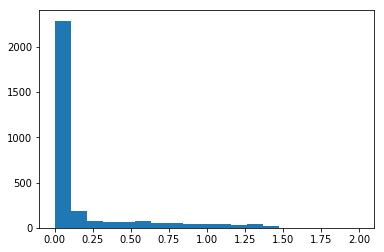

In [39]:
plt.hist(tol_koi, bins = np.linspace(0,2,20))
print harmonics_koi.shape, tol_koi.shape
#Here is the error distribution of the primary KOI
tot_vals_koi = np.hstack([harmonics_koi, tol_koi.reshape(harmonics_koi.shape[0], 1)]) 
print tot_vals_koi.shape

In [40]:
#np.savetxt("../Data/period_harmonics_3080_koi_signals_tol_5x5_ordered_multiplanet.txt", tot_vals_koi)
#np.savetxt("../Data/koi_periods_multiplanet.txt", final_planet_periods)
print len(np.where)

Now that the period that gives the minimu error has been determined, we can find the SNR with that period value

In [42]:
star_name = koi["kepid"].values
inds = np.where(koi["koi_model_snr"]==np.nan)[0]
koi["koi_model_snr"][inds]==0.


SNR = np.zeros(len(star_list))
star_name_id = np.zeros_like(SNR)
star_segment = np.zeros_like(SNR)



start  = time.time()

#print final_planet_periods[0]
#if final_planet_periods[0] in koi["koi_period"].values:
    #print "its in here"

for i, val in enumerate(star_list[:5]): # list of star names and star segments
    name = int(val.split("-")[0]) # starname
    file_name = val#(val.split("-")[0]) + "-"+(val.split("-")[1]).split("_")[0]
   
    if name in star_name.tolist():
        lc_data = np.loadtxt("../../../Training/simulation/primaryKOI_try2//"+file_name+"_prim_ltf.lc")
        #print name, final_planet_periods[i]
        #print periods
        #location = np.where(final_planet_periods[i] == koi["koi_period"].values)[0]
        period_of_interest = final_planet_periods[i] # this is the minimum planet period
        #print np.where(period_of_interes)
        #print period_of_interest
        #location = np.where(period_of_interest== koi["koi_period"].values)[0]
        #location = np.where((koi["kepid"].values== int(name)))[0]
        #print koi[["kepid", "koi_period"]].shape, koi["koi_period"].shape
        location = planet_location[i]
        #planet_num = 0
        
        
        
        

        try:
            #the factor of dividing it by 110 is becuase prad is given in Earth Radii
            depth = ((koi["koi_prad"][location]/ koi["koi_srad"][location])/float(110))**2      
            period = koi["koi_period"][location] #days
            periods[i] = period
            duration = koi["koi_duration"][location] #hours
            model_snr = koi["koi_model_snr"][location]
            n_points = np.floor(duration * 2) # assuming duration is given in hours, as days does not make sense
            meidan = np.median(lc_data[:,2]) # flux
            error = np.median(np.abs(lc_data[:,2]-meidan)**2)**0.5
            n_transits = float(26)//float(period) +1
           
            SNR[i] = depth*np.sqrt(n_transits) * np.sqrt(n_points)/(error*np.sqrt(2))
            star_name_id[i] = val.split("-")[0]
            star_segment[i] = (val.split("-")[1]).split("_")[0]
           
        except:
            continue   
        #break
       
    else:
        print "Not in list", val[:-17]#+"ltf.lc"
        #break
    if i %1000 ==999:
        print i
print SNR.shape, star_name_id.shape, star_segment.shape

(3080,) (3080,) (3080,)


In [46]:

size = SNR.shape[0]
SNR_feats = np.hstack([star_name_id.reshape(size, 1), star_segment.reshape(size,1), SNR.reshape(size, 1)])
print SNR_feats.shape
#np.savetxt("../Data/SNR_feats_KOIS_3080_fixed_multiplanet.txt", SNR_feats)


(3080, 3)
